<h3><b> Import Libraries </b></h3>

In [5]:
import numpy as np
import pandas as pd
import csv
from collections import defaultdict

<h4><b>Import LSTM dataset</b></h4>

In [6]:
train_log= pd.read_csv('/content/sample_data/norm.csv')
train_log

,enrollment_id,date,access,discussion,navigate,page_close,problem,video,wiki,session,tot_time,result
0,1,13/06/14,0.043872,1.149425,6.721311,0.0,0.589971,0.000000,0.0,3.589744,3.856869,0
1,1,13/06/14,0.076775,0.000000,6.721311,0.0,0.825959,0.000000,0.0,3.589744,3.856869,0
2,1,13/06/14,0.345489,0.689655,3.114754,0.0,2.418879,2.416107,0.0,3.589744,3.856869,0
3,1,13/06/14,0.510008,0.000000,5.081967,0.0,4.896755,3.892617,0.0,3.589744,3.856869,0
4,4,15/06/14,0.082259,0.000000,4.426230,0.0,0.294985,0.268456,0.0,2.820513,2.368965,0
...,...,...,...,...,...,...,...,...,...,...,...,...
34907,197022,NaN,0.010968,0.000000,0.000000,0.0,0.000000,0.134228,0.0,0.000000,0.017205,1
34908,197027,NaN,0.010968,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.032297,1
34909,197027,NaN,0.010968,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.032297,1
34910,197027,NaN,0.010968,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.032297,1


<h4><b> Data Manipulation</b></h4>

In [11]:
gb = train_log.groupby('enrollment_id')
enrollment_id = []
results = []
session = []
total_Time = []
df = pd.DataFrame(columns = ['Enrollment_ID', 'Access',"Discussion","Navigate","Page Close", "Problems","Video", 'Session',"Wiki", 'Total_Time', 'Result'])

for i in range(len(train_log)):
    if i%4==0:
        enrollment_id.append(train_log['enrollment_id'][i])
        session.append(train_log['session'][i])
        total_Time.append(train_log['tot_time'][i])
        results.append(train_log['result'][i])

#print(results)
df["Enrollment_ID"] = enrollment_id 
df["Session"] = session
df["Total_Time"] = total_Time
df["Result"] = results

res = pd.concat([i[1].sum(numeric_only=True) for i in gb], axis=1).T

df["Access"] = res.access
df["Discussion"] = res.discussion
df["Navigate"] = res.navigate
df["Page Close"] = res.page_close
df["Problems"] = res.problem
df["Video"] = res.video
df["Wiki"] = res.wiki
print(df)
df.to_csv('MLModels_Norm.csv', index = False)


      Enrollment_ID    Access  Discussion  ...  Wiki  Total_Time  Result
0                 1  0.976145    1.839080  ...   0.0    3.856869       0
1                 4  0.888401    1.379310  ...   0.0    2.368965       0
2                 9  0.460653    0.000000  ...   0.0    3.078734       1
3                12  0.394845    4.137931  ...   0.0    2.693892       0
4                14  0.614203    6.896552  ...   0.0    3.339521       1
...             ...       ...         ...  ...   ...         ...     ...
8723         196915  0.219358    0.000000  ...   0.0    0.117113       1
8724         196955  0.021936    0.000000  ...   0.0    0.012677       1
8725         196956  0.241294    0.000000  ...   0.0    0.250675       1
8726         197022  0.043872    0.000000  ...   0.0    0.017205       1
8727         197027  0.043872    0.000000  ...   0.0    0.032297       1

[8728 rows x 11 columns]


<h3><b>HeatMap</b></h3>

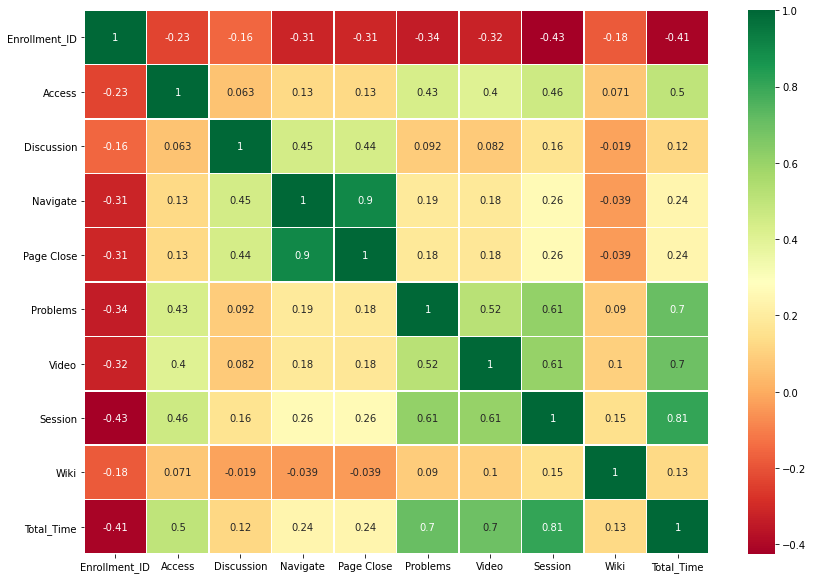

In [14]:
data= pd.read_csv('/content/MLModels_Norm.csv')
data.drop(["Result"], axis = 1, inplace = True) 
import matplotlib.pyplot as plt

import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,10))
#plot heat map
a=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn",linewidths=0.5)
plt.savefig("output.png")
